In [ ]:
#You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. 
#You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia 
#(which is an inexpensive diamond alternative with many of the same qualities as a diamond). 
#The company is earning different profits on different prize slots. You have to help the company in predicting the price
#for the stone on the basis of the details given in the dataset so it can distinguish between higher profitable stones
#and lower profitable stones so as to have a better profit share. 

In [503]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import OneHotEncoder
import time
import statsmodels.api as sm
import pylab as py
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
import numpy, warnings 
numpy.warnings = warnings 
from scipy import stats

In [504]:
df = pd.read_csv('cubic_zirconia.csv',index_col=0)
df.head()

carat        cut color clarity  depth  table     x     y     z  price
1   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66    499
2   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70    984
3   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   6289
4   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   1082
5   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65    779

In [505]:
#Carat	 Carat weight of the cubic zirconia.
#Cut	 Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
#Color 	 Colour of the cubic zirconia.With D being the best and J the worst.
#Clarity	 cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst,
#FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
#Depth	 The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
#Table	 The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
#Price	 the Price of the cubic zirconia.
#X	 Length of the cubic zirconia in mm.
#Y	 Width of the cubic zirconia in mm.
#Z	 Height of the cubic zirconia in mm.

In [506]:
#view some basic statistical details
df.describe()

carat         depth         table             x             y  \
count  26967.000000  26270.000000  26967.000000  26967.000000  26967.000000   
mean       0.798375     61.745147     57.456080      5.729854      5.733569   
std        0.477745      1.412860      2.232068      1.128516      1.166058   
min        0.200000     50.800000     49.000000      0.000000      0.000000   
25%        0.400000     61.000000     56.000000      4.710000      4.710000   
50%        0.700000     61.800000     57.000000      5.690000      5.710000   
75%        1.050000     62.500000     59.000000      6.550000      6.540000   
max        4.500000     73.600000     79.000000     10.230000     58.900000   

                  z         price  
count  26967.000000  26967.000000  
mean       3.538057   3939.518115  
std        0.720624   4024.864666  
min        0.000000    326.000000  
25%        2.900000    945.000000  
50%        3.520000   2375.000000  
75%        4.040000   5360.000000  
max       31.800000  18818.000000

In [507]:
#get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [508]:
df.shape

(26967, 10)

In [509]:
#rename columns
df=df.rename(columns={'x':'length','y':'width','z':'height'})

In [510]:
#check duplicates
df.duplicated().sum()

34

In [511]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [512]:
#check null values
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
length       0
width        0
height       0
price        0
dtype: int64

<AxesSubplot:>

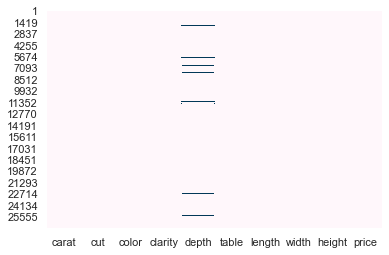

In [513]:
sns.set(font_scale=1)
sns.heatmap(df.isnull(), cbar=False, cmap='PuBu')
#Heatmap is showing missing value

In [514]:
#percent of missing values
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

depth      0.025879
price      0.000000
height     0.000000
width      0.000000
length     0.000000
table      0.000000
clarity    0.000000
color      0.000000
cut        0.000000
carat      0.000000
dtype: float64

In [515]:
#the min values of x,y,z are 0 which means it must be faulty values because diamonds are not dimensionless
df.drop(df[df['length']==0].index,axis=0,inplace=True)
df.drop(df[df['height']==0].index,axis=0,inplace=True)
df.drop(df[df['width']==0].index,axis=0,inplace=True)

In [516]:
#fill the missing values
#imputer=KNNImputer(n_neighbors=5)
#df['depth']=imputer.fit_transform(df['depth'].values.reshape(-1, 1))

In [517]:
#counts of unique values for cut feature 
df['cut'].value_counts()

Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64

In [518]:
#counts of unique values for color feature 
df['color'].value_counts()

G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: color, dtype: int64

In [519]:
#counts of unique values for clarity feature 
df['clarity'].value_counts()

SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64

In [520]:
#feature engineering  -  designing artificial features
df['volume'] = df['width'] * df['height'] * df['length']
df['density'] = df['carat'] / df['volume']
df['area'] = df['height']*df['table'] 

In [521]:
#numerical features
num_cols=df.drop('price',axis=1).select_dtypes(include='number').columns
num_cols

Index(['carat', 'depth', 'table', 'length', 'width', 'height', 'volume',
       'density', 'area'],
      dtype='object')

In [522]:
#categorical features
cat_cols=df.select_dtypes(exclude='number').columns
cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [523]:
##remove outliers function with the help of interquartile range
def remove_outliers(df,cols):
    for item in cols:
        sorted(item)
        q25,q75=np.percentile(df[item],[25,75])
        IQR=q75-q25
        lower=q25-1.5*IQR
        upper=q75+1.5*IQR
        df.drop((df[(df[item]<lower) | (df[item]>upper)]).index , axis=0,inplace=True)

In [524]:
#cap/floor outliers function with the help of IQR
def cap_floor_outliers(df,cols):
    for i,col in enumerate(cols):
        sorted(col)
        q25,q75=np.percentile(df[col],[25,75])
        iqr=q75-q25
        lower=q25-1.5*iqr
        upper=q75+1.5*iqr
        df.loc[df[col]<lower,col] = np.percentile(df[col], 10)
        df.loc[df[col]>upper,col] = np.percentile(df[col], 90)

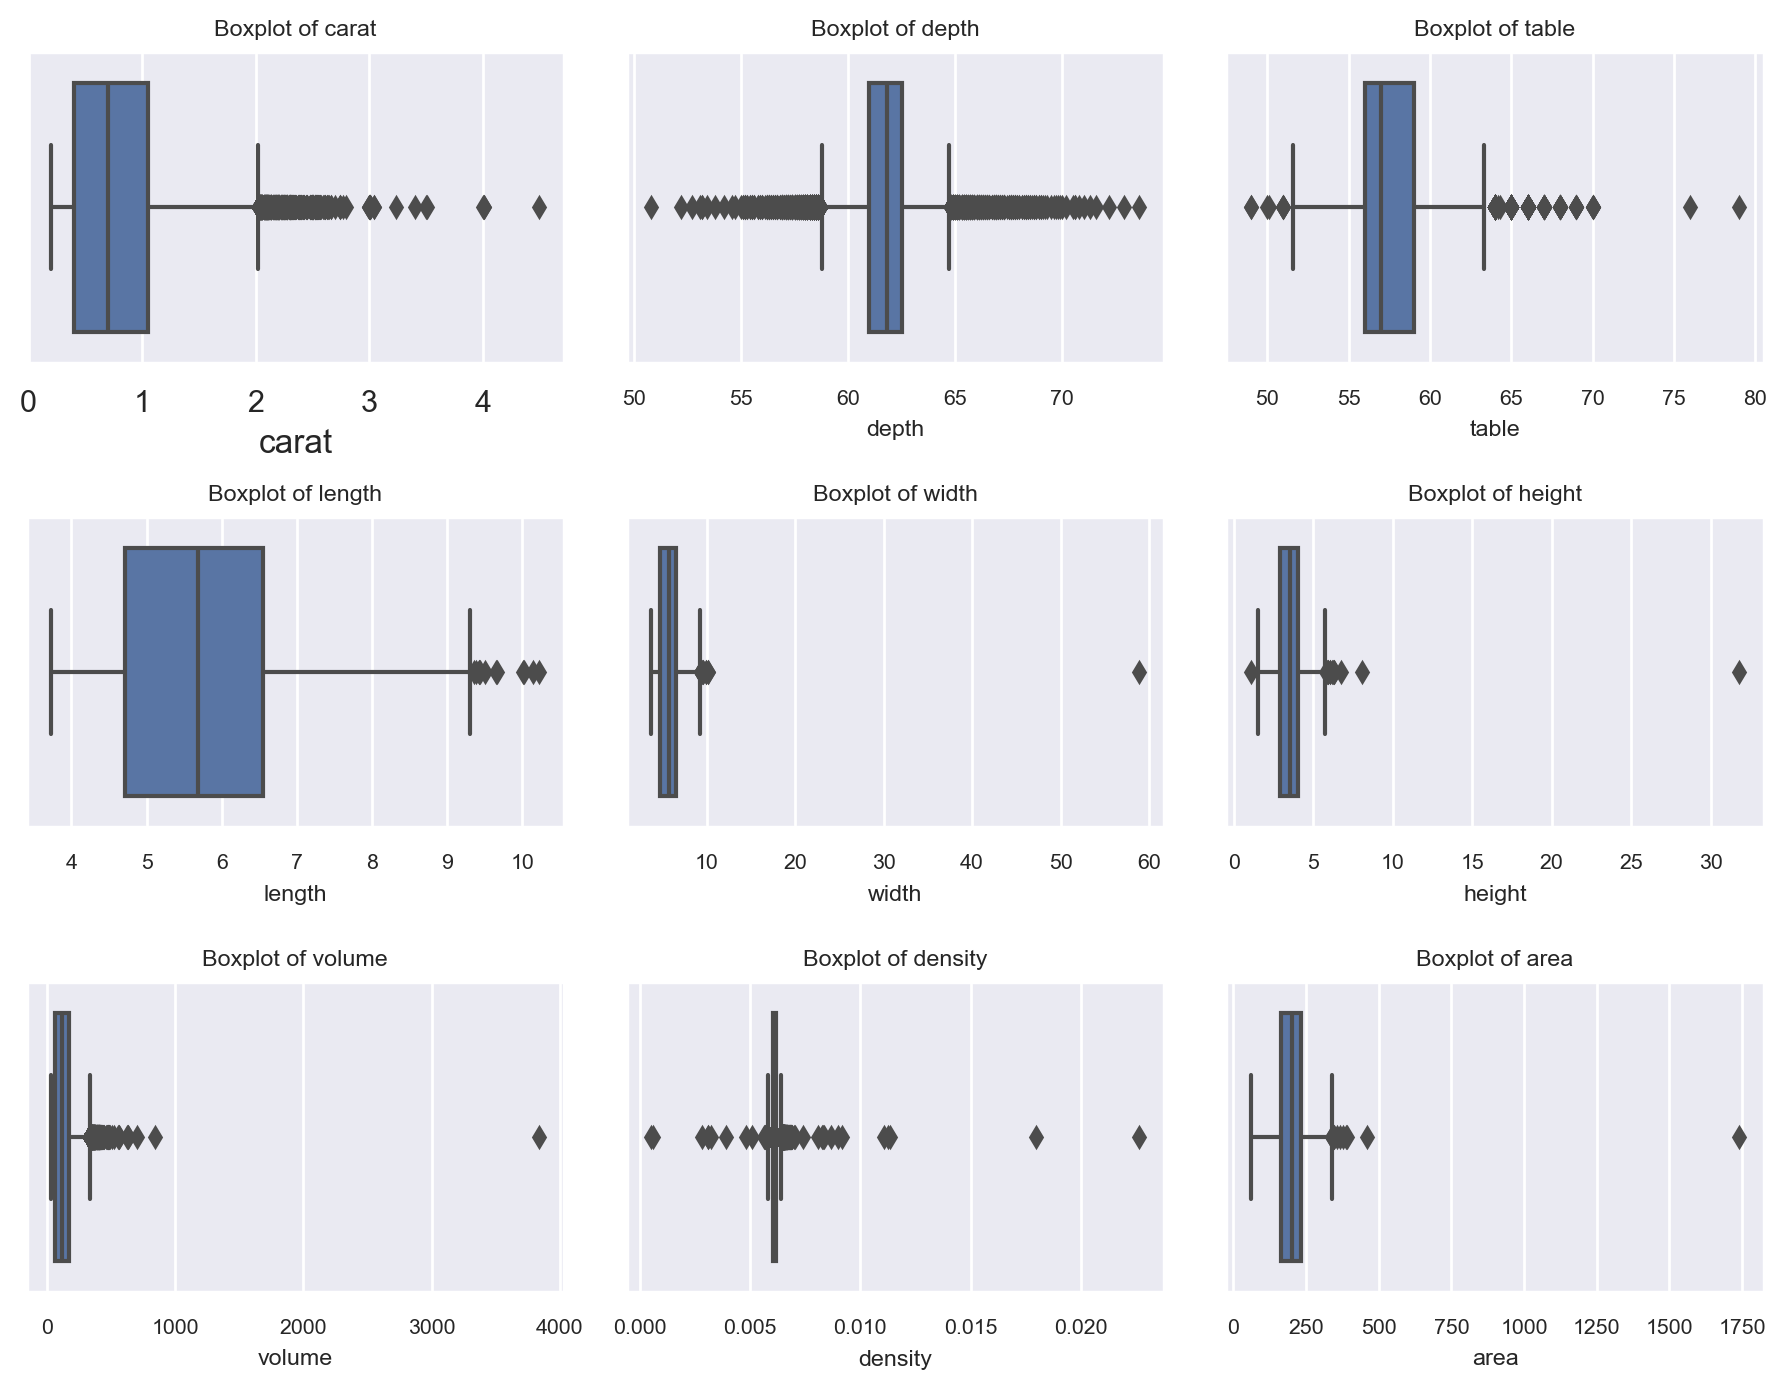

In [525]:
#visualize outliers with boxplots
i=0
plt.figure(figsize=(9,7),dpi=200)
for i,item in enumerate(num_cols):
    ax=plt.subplot(3,3,i+1)
    sns.set(font_scale = 0.7)
    sns.boxplot(data=df,x=item,ax=ax)
    ax.set_title(f'Boxplot of {item}')
    i=i+1
plt.tight_layout()

In [526]:
remove_outliers(df,num_cols)

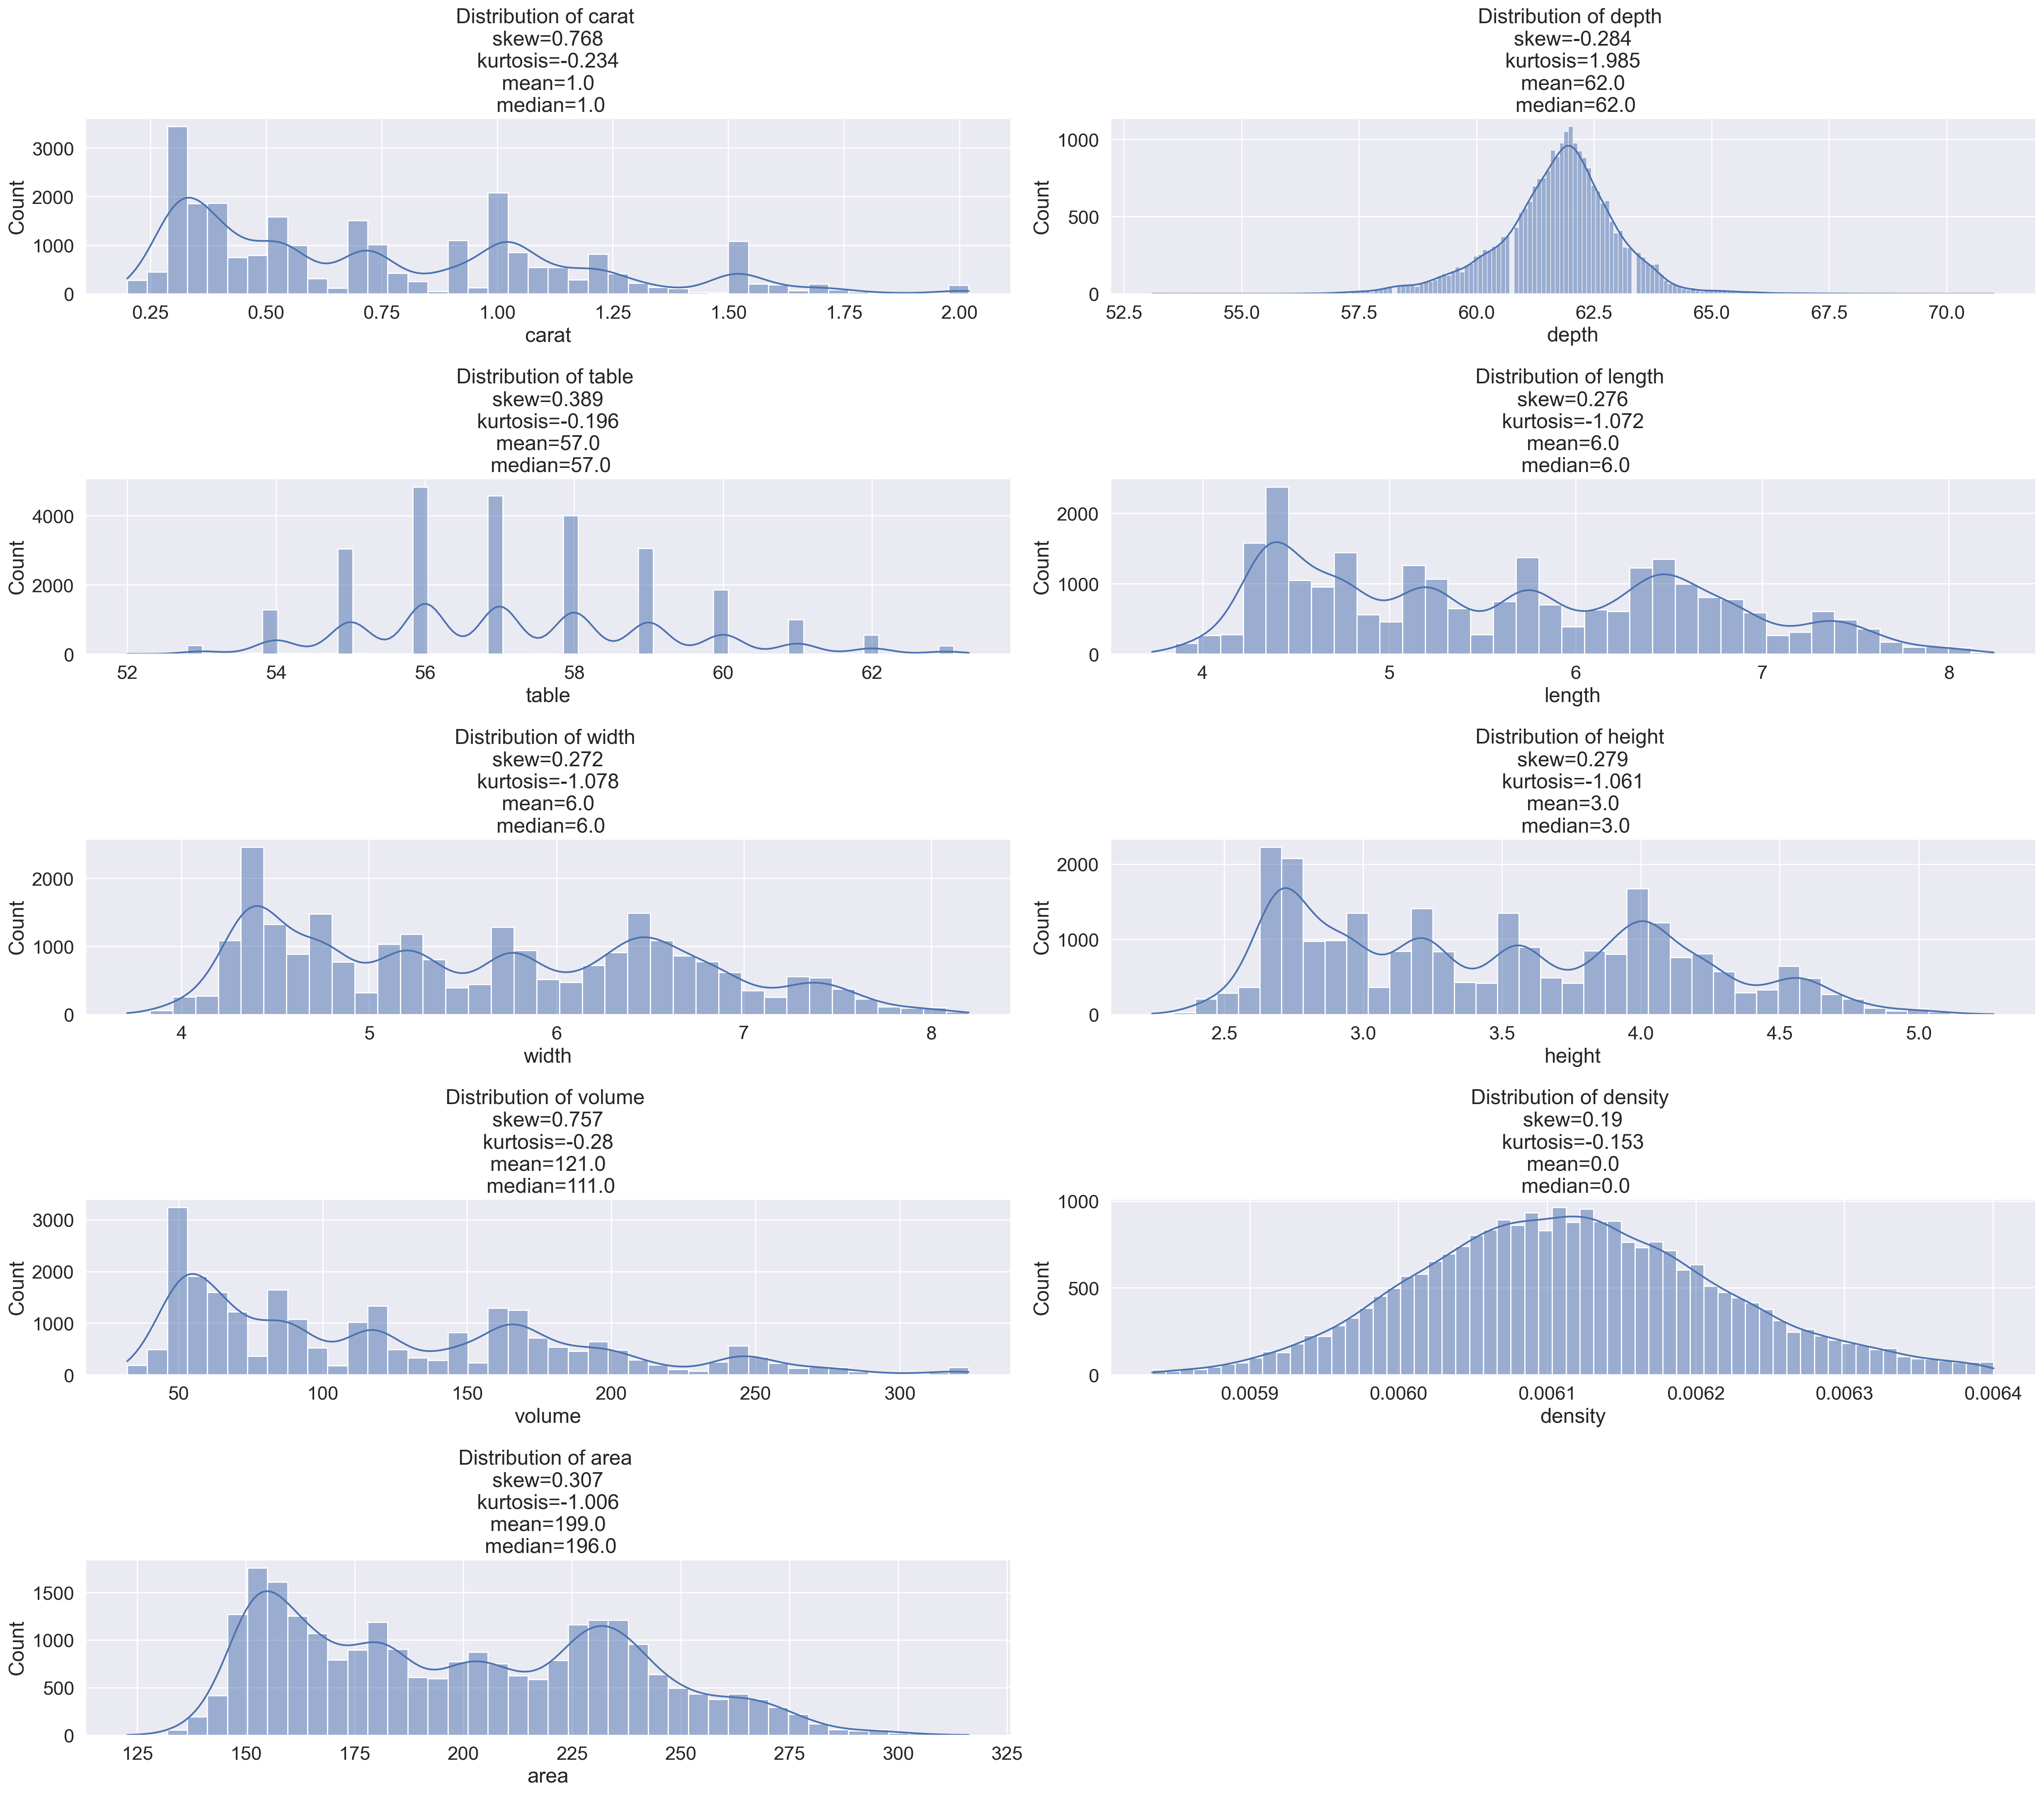

In [527]:
#univariate analysis for the numerical features
#histogram/skew(If the skewness is between -0.5 and 0.5, the data are fairly symmetrical)/kurtosis(Kurtosis=3 looks more close to a normal distribution)/mean/median
plt.figure(figsize=(25,22),dpi=200)
sns.set(font_scale = 1.5)
for j,col in enumerate(num_cols):
    plt.subplot(5,2,j+1)
    sns.histplot(data=df,x=df[col],kde=True)
    skew=np.round(df[col].skew(),3)
    kurtosis=np.round(df[col].kurtosis(),3)
    mean=np.round(df[col].mean())
    median=np.round(df[col].median())
    plt.title(f'Distribution of {col} \n skew={skew} \n kurtosis={kurtosis} \n mean={mean} \n median={median}')
    plt.tight_layout()
plt.show()

#depth/density are long tailed on both ends
#carat/volume are positively skewed and platykurtic
#area/volume/density/length/width/height are platykurtic
#width/height/length are very similar

In [528]:
#visualize numerical features
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(7,6),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=8)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=8)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=8, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

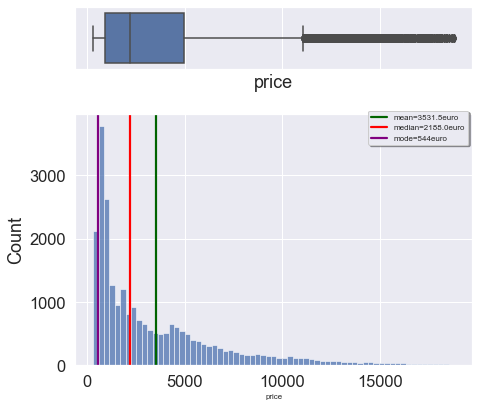

In [529]:
num_plot(df,'price','','euro')
#The cheapest gems are most frequent but there is a large tail of high priced gems.
#There is a big difference in price between min (326) and max (18 818).

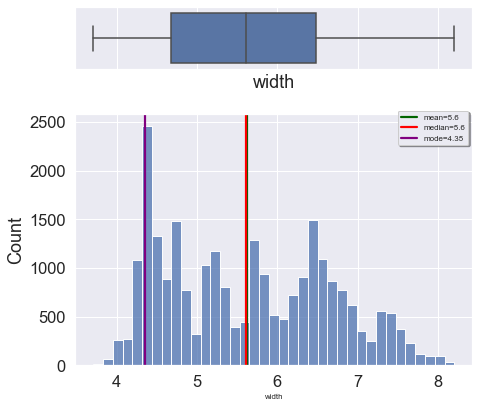

In [530]:
num_plot(df,'width','','')

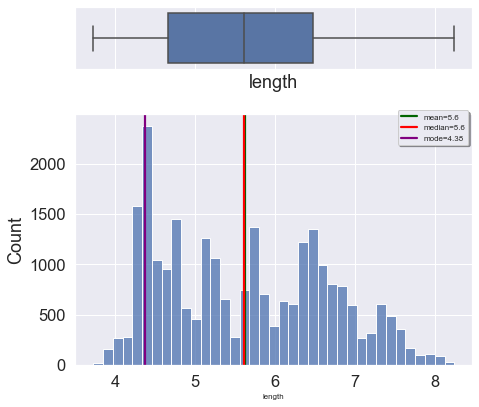

In [531]:
num_plot(df,'length','','')

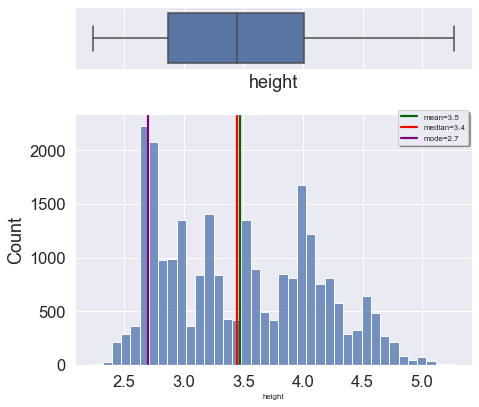

In [532]:
num_plot(df,'height','','')

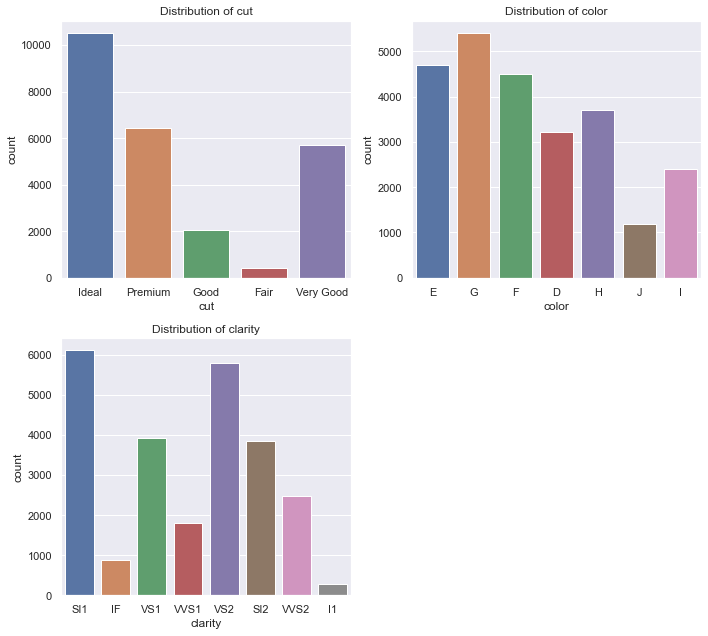

In [533]:
#plotting categorical variables
plt.figure(figsize=(10,9))
sns.set(font_scale = 1)
for i,item in enumerate(cat_cols):
    ax = plt.subplot(2,2,i+1)
    sns.set(font_scale = 1)
    sns.countplot(data=df,x=item)
   # ax.set_xlabel(None)
    ax.set_title(f'Distribution of {item}')
    plt.tight_layout()

plt.show()

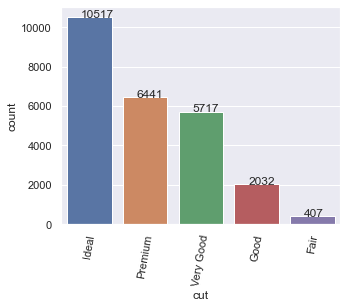

In [534]:
#wich cut is the most frequent
sns.set(font_scale=1)
fig,ax=plt.subplots(figsize=(5,4))
ax=sns.countplot(data=df,x='cut',order=df['cut'].value_counts().index)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation=80);

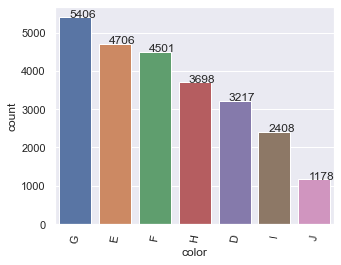

In [535]:
#wich color is the most frequent
sns.set(font_scale=1)
fig,ax=plt.subplots(figsize=(5,4))
ax=sns.countplot(data=df,x='color',order=df['color'].value_counts().index)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation=80);

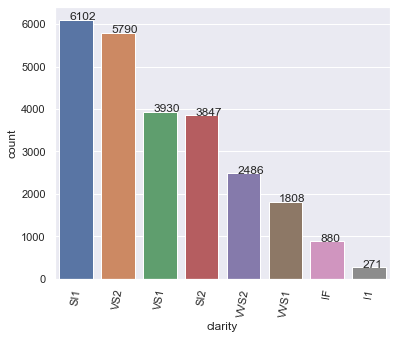

In [536]:
#wich clarity is the most frequent
sns.set(font_scale=1)
fig,ax=plt.subplots(figsize=(6,5))
ax=sns.countplot(data=df,x='clarity',order=df['clarity'].value_counts().index)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation=80);

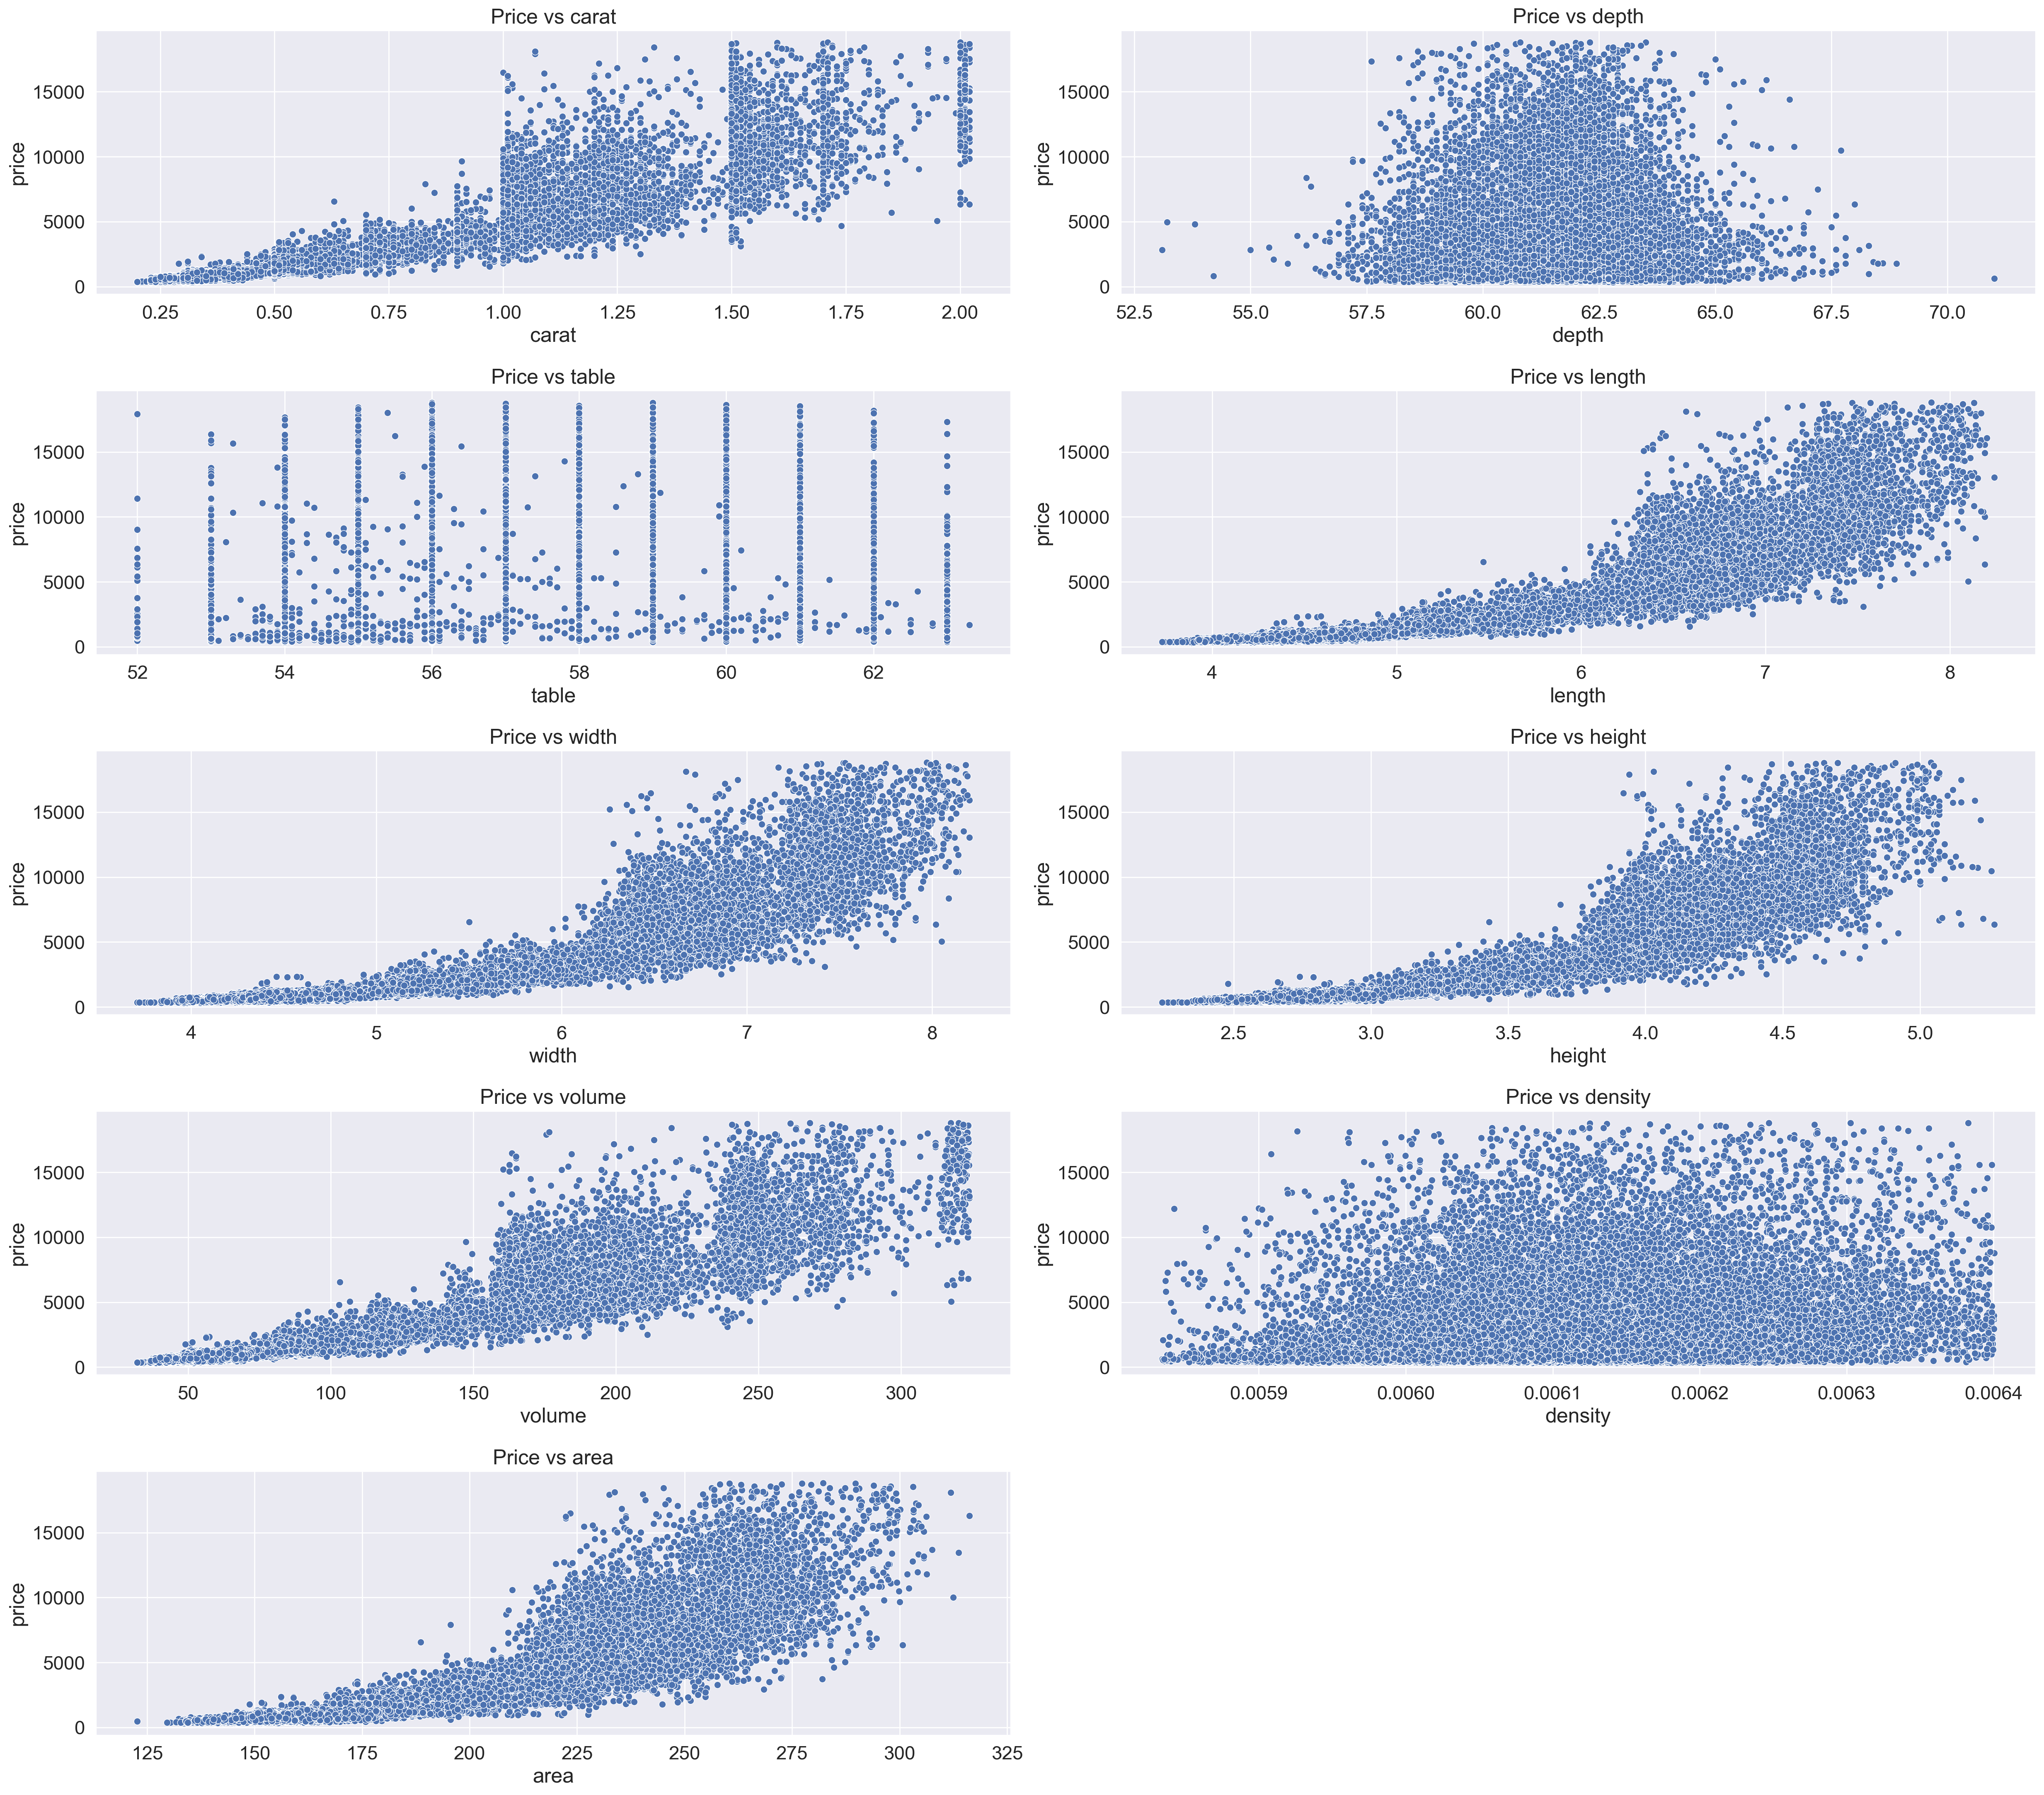

In [537]:
#bivariate analysis with scatterplot
plt.figure(figsize=(25,22),dpi=200)
sns.set(font_scale = 1.5)
for j,col in enumerate(num_cols):
    plt.subplot(5,2,j+1)
    sns.scatterplot(data=df,x=df[col],y='price')
    plt.title(f'Price vs {col}')
    plt.tight_layout()
plt.show()
#price and carat/length/width/height/volume are are positively correlated
#doesnt't seem to be any correlation between price vs depth or price vs density

<Figure size 5000x4400 with 0 Axes>

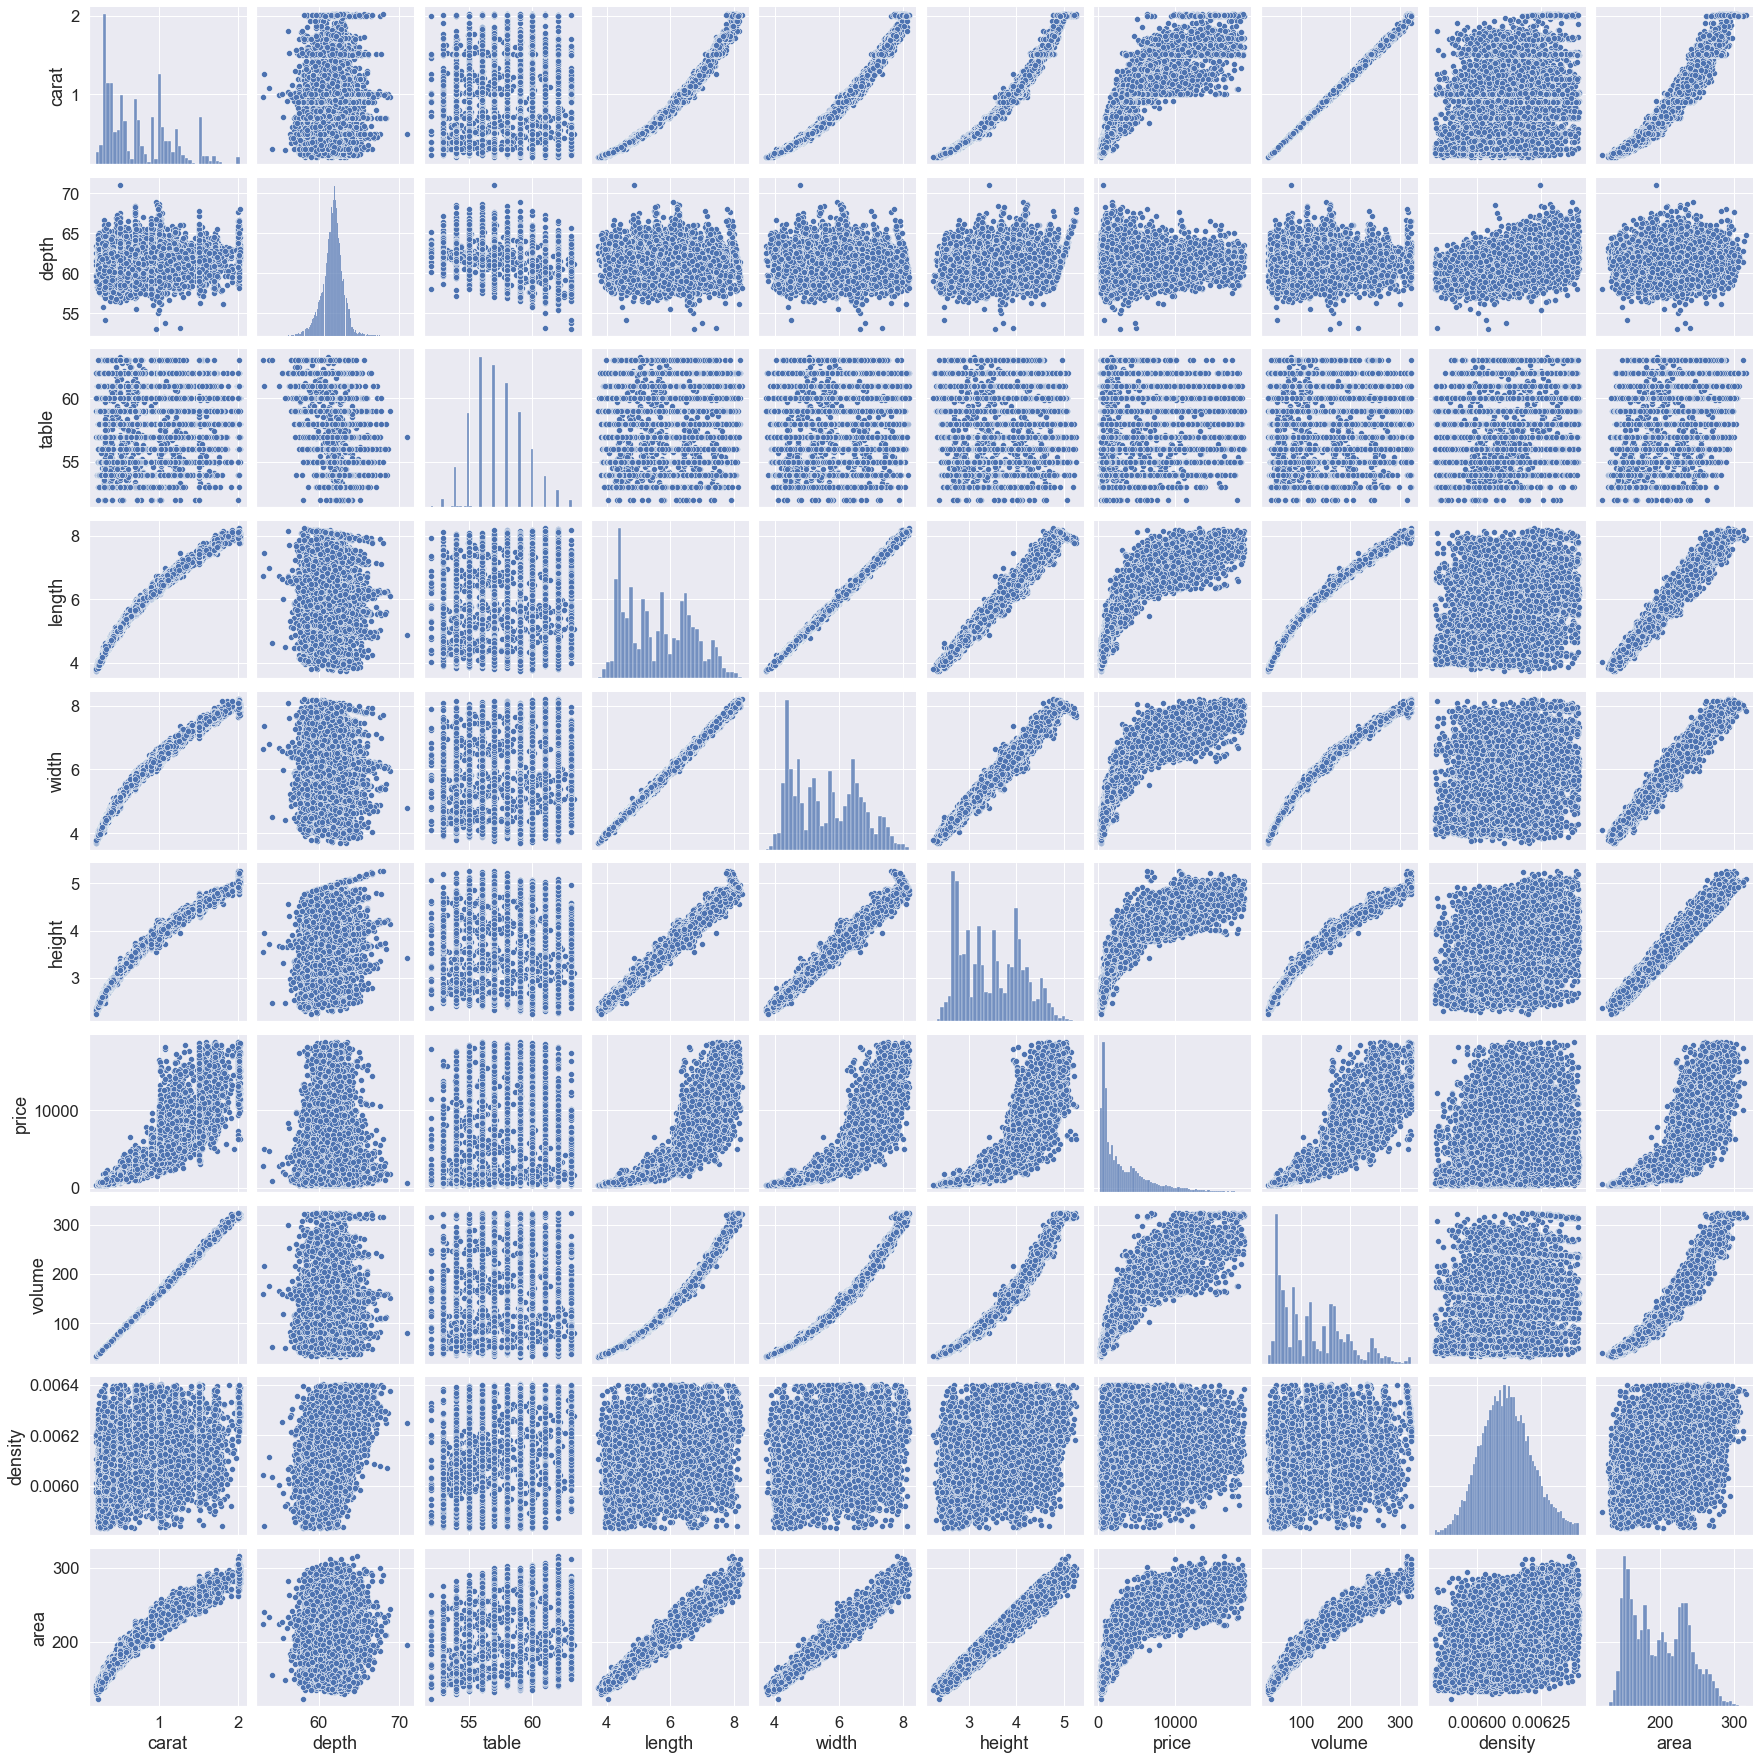

In [538]:
#bivariate analysis with seaborn pairplot
plt.figure(figsize=(25,22),dpi=200)
sns.pairplot(data=df)
#carat is positively correlated with length/with/height/volume/area
#depth and density don't seem to have any correlation
#length is positively correlated with carat/width/height/volume/area
#width is positively correlated with carat/legth/height/volume/area
#height is positively correlated with carat/legth/width/volume/area
#volume is positively correlated with  carat/legth/width/height/area
#area is positively correlated with carat/legth/width/height/volume

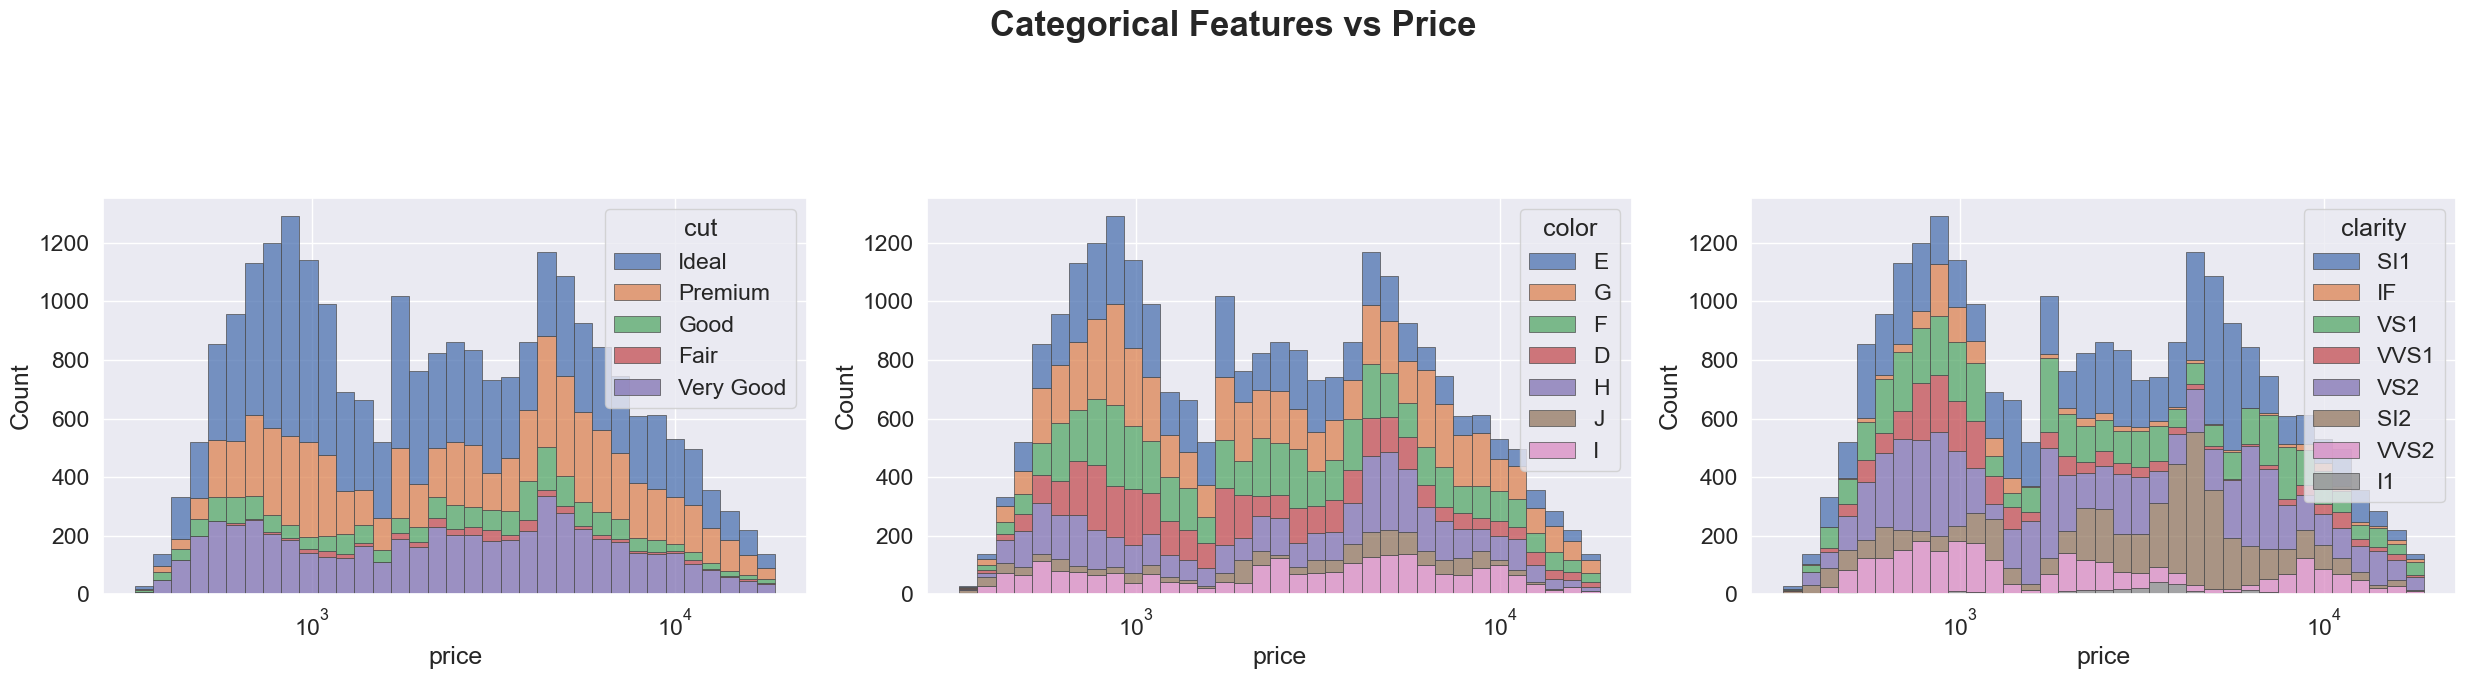

In [539]:
#histograms of price with hue mapping
fig, ax = plt.subplots(1, 3, figsize=(25, 7), dpi=100)
ax = ax.flatten()
for i, ft in enumerate(['cut', 'color', 'clarity']):
    sns.histplot(
        data=df,
        x="price", hue=ft,
        multiple="stack",
        edgecolor=".3",
        linewidth=.5,
        log_scale=True,
        ax=ax[i]
    )
fig.suptitle(f'Categorical Features vs Price\n\n\n', ha='center',  fontweight='bold', fontsize=25)
plt.tight_layout()
plt.show()

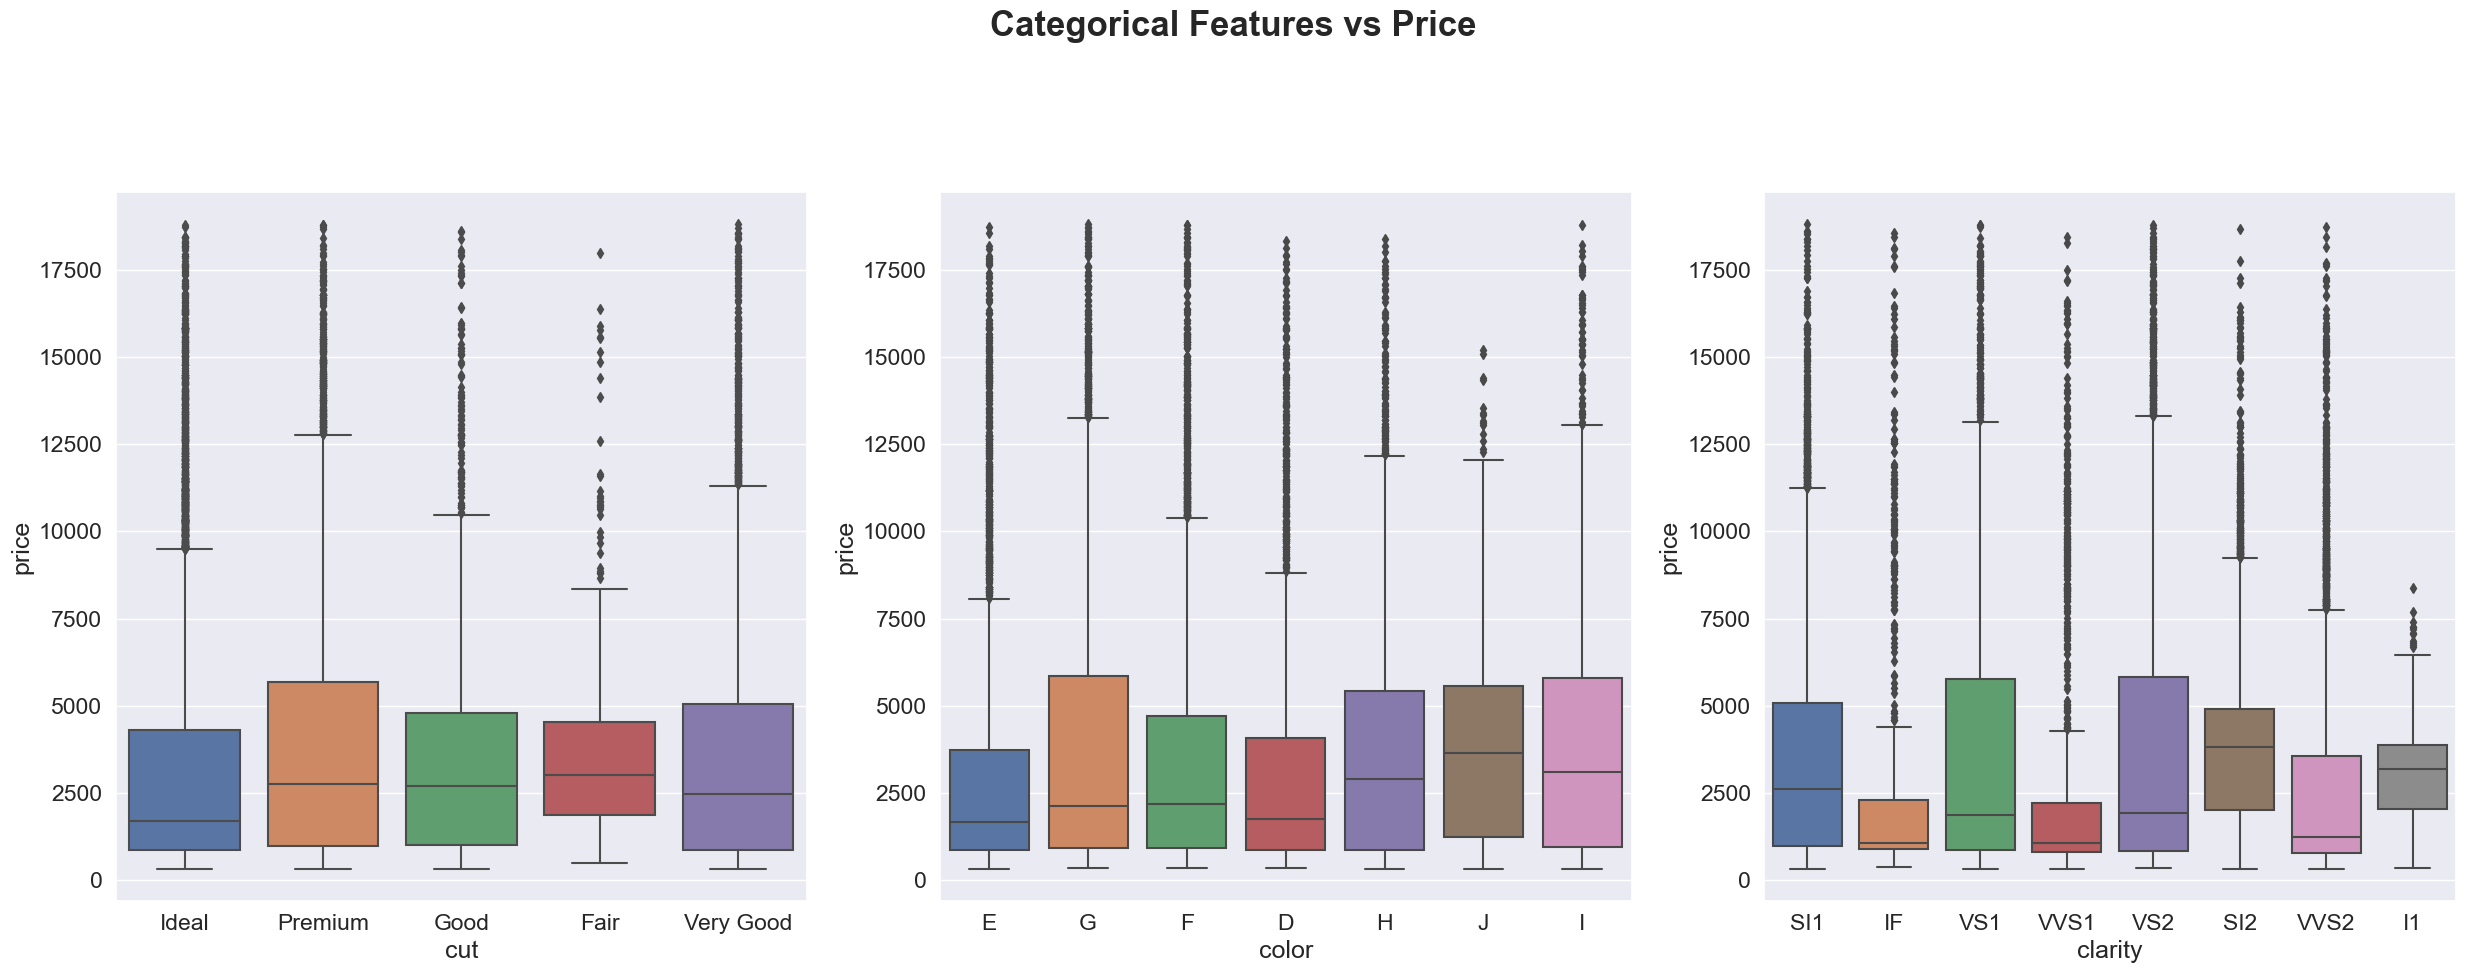

In [540]:
fig, ax = plt.subplots(1, 3, figsize=(25, 10), dpi=100)
ax = ax.flatten()
for i, ft in enumerate(['cut', 'color', 'clarity']):
    sns.boxplot(data=df,y="price", x=ft,ax=ax[i])
fig.suptitle(f'Categorical Features vs Price\n\n\n', ha='center',  fontweight='bold', fontsize=25)
plt.tight_layout()
plt.show()

In [541]:
#frequency table of color and clarity 
pd.crosstab(df.color, df.clarity).style.background_gradient(cmap='YlOrRd')

In [542]:
#frequency table of color and cut
pd.crosstab(df.color, df.cut).style.background_gradient(cmap='YlOrRd')

In [543]:
#frequency table of cut and clarity
pd.crosstab(df.cut, df.clarity).style.background_gradient(cmap='YlOrRd')

<AxesSubplot:title={'center':'Unbiased skew'}>

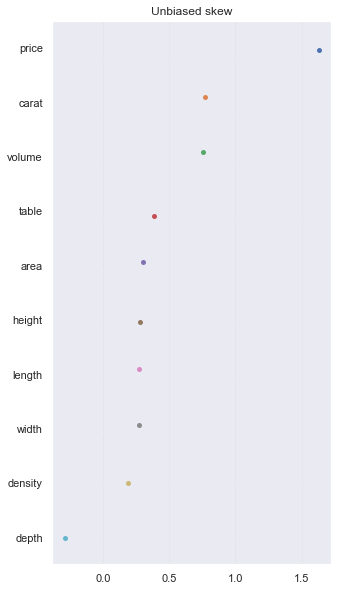

In [544]:
#check the skewness of the features
sns.set(font_scale=1)
def skew_plot(df, ax=None):
    skewed = df.skew().sort_values(ascending=False)
    return sns.stripplot(x=skewed.values, y=skewed.index, ax=ax)
plt.figure(figsize=(5, 10))
plt.title('Unbiased skew')
plt.grid(axis='y', color='#e0e0e0', linestyle=':')
plt.grid(axis='x', color='#e0e0e0', linestyle=':')
skew_plot(df)
#volume and carat and price are highly skewed
#table/length/depth/width/height/area/density moderatly skewed

0.01416696756018328

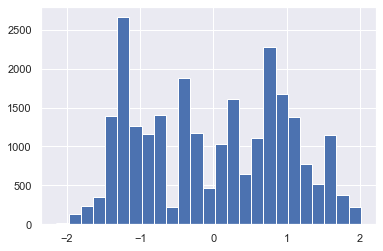

In [545]:
#apply BoxCox transformation to make the carat feature more symetrical 
from sklearn.preprocessing import PowerTransformer
power_tr = PowerTransformer(method='box-cox')
power_tr.fit(df['carat'].values.reshape(-1,1))
df['carat']  = power_tr.transform(df['carat'].values.reshape(-1,1))
plt.hist(df.carat, bins=25);
df.carat.skew()

0.01416696756018328

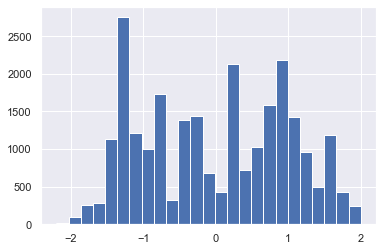

In [546]:
#apply BoxCox transformation to make the volume feature more symetrical 
from sklearn.preprocessing import PowerTransformer
power_tr = PowerTransformer(method='box-cox')
power_tr.fit(df['volume'].values.reshape(-1,1))
df['volume']  = power_tr.transform(df['volume'].values.reshape(-1,1))
plt.hist(df.volume, bins=25);
df.carat.skew()

0.03251543167499068

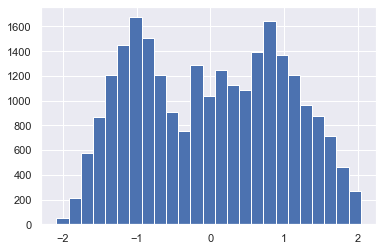

In [547]:
#apply BoxCox transformation to make the price feature more symetrical 
power_tr.fit(df['price'].values.reshape(-1,1))
df['price']  = power_tr.transform(df['price'].values.reshape(-1,1))
plt.hist(df.price, bins=25);
df.price.skew()

In [548]:
#Feature encoding for cut and clarity
#FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
clarity_dict={ 'IF':1, 'VVS1':2, 'VVS2':3, 'VS1':4, 'VS2':5, 'SI1':6, 'SI2':7, 'I1':8}  
cut_dict={'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
df['clarity']=df['clarity'].map(clarity_dict)
df['cut']=df['cut'].map(cut_dict)

In [549]:
num_cols=df.drop('price',axis=1).select_dtypes(include='number').columns
cat_cols=df.select_dtypes(exclude='number').columns

In [550]:
#create pipelines for data processing.
#Numerical features are imputed and scaled.Categorical features are imputed and encoded.
num_pipeline=Pipeline([('imputer',KNNImputer(missing_values=np.nan,n_neighbors=3)),('scale',MinMaxScaler())])
cat_pipeline=Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),('ohe',OneHotEncoder(drop='first'))])

In [551]:
preprocessed=ColumnTransformer(transformers=[('num_transf',num_pipeline,num_cols),('cat_transf',cat_pipeline,cat_cols)])
preprocessed.fit(df.drop('price',axis=1))

ColumnTransformer(transformers=[('num_transf',
                                 Pipeline(steps=[('imputer',
                                                  KNNImputer(n_neighbors=3)),
                                                 ('scale', MinMaxScaler())]),
                                 Index(['carat', 'cut', 'clarity', 'depth', 'table', 'length', 'width',
       'height', 'volume', 'density', 'area'],
      dtype='object')),
                                ('cat_transf',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first'))]),
                                 Index(['color'], dtype='object'))])

In [552]:
categorical_col_names=preprocessed.named_transformers_['cat_transf']['ohe'].get_feature_names_out(cat_cols)
numerical_col_names=preprocessed.named_transformers_['num_transf']['scale'].get_feature_names_out(num_cols)

In [553]:
df_preprocessed=pd.DataFrame(data=preprocessed.transform(df.drop('price',axis=1)),columns=np.append(numerical_col_names,categorical_col_names))
df_preprocessed.head()

carat   cut   clarity     depth     table    length     width    height  \
0  0.185729  1.00  0.714286  0.502793  0.530973  0.119734  0.129176  0.138614   
1  0.228721  0.75  0.000000  0.430168  0.530973  0.152993  0.167038  0.151815   
2  0.336390  1.00  0.428571  0.474860  0.353982  0.241685  0.242762  0.237624   
3  0.200548  1.00  0.142857  0.407821  0.619469  0.137472  0.160356  0.135314   
4  0.719122  1.00  0.571429  0.469274  0.353982  0.605322  0.619154  0.577558   

     volume   density      area  color_E  color_F  color_G  color_H  color_I  \
0  0.189711  0.569706  0.163118      1.0      0.0      0.0      0.0      0.0   
1  0.229656  0.646071  0.175109      0.0      0.0      1.0      0.0      0.0   
2  0.342453  0.527585  0.222452      0.0      1.0      0.0      0.0      0.0   
3  0.210956  0.417226  0.173816      0.0      1.0      0.0      0.0      0.0   
4  0.728184  0.464920  0.520571      0.0      0.0      0.0      0.0      0.0   

   color_J  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0

<AxesSubplot:>

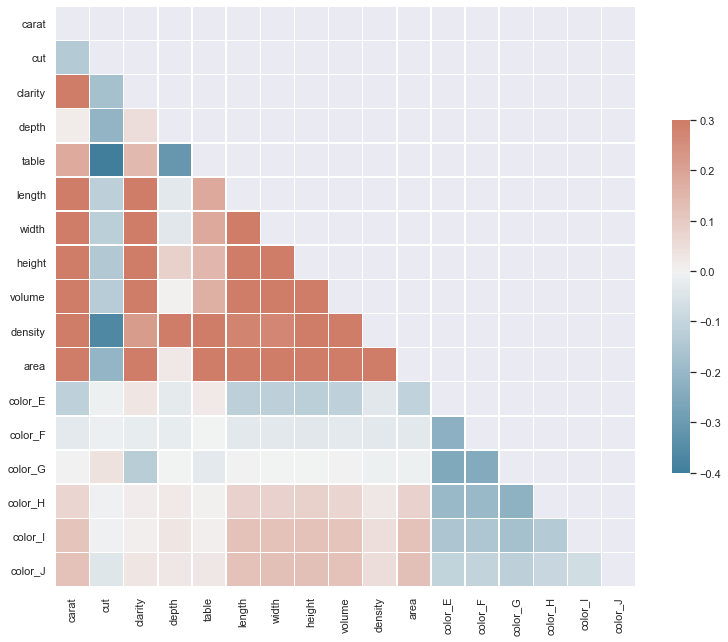

In [554]:
#correlation matrix
corr=df_preprocessed.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
plt.figure(figsize=(13,13))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.set(font_scale=1)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


#carat and clarity/length/width/height/volume/density/area are strongly positively correlated to each other.
#clarity and area/volume/length/width/height are strongly positively correlated to each other.
#density is strongly positively correlated with area
#volume is strongly positively correlated with area/clarity
#depth is strongly positively correlated with density
#height is strongly positively correlated with area/density/volume
#width is strongly positively correlated with area/density/volume/height
#length is strongly positively correlated with area/density/volume/height/width
#cut is negatively correlated with table and density

In [555]:
#returns DataFrame with the features paired correlations
def get_feature_correlation(df,top_n=None,corr_method='spearman'):
    corr_matrix_abs=df.corr(method=corr_method).abs()
    corr_matrix_us=corr_matrix_abs.unstack()
    sorted_correlated_features=corr_matrix_us.sort_values(kind="quicksort", ascending=False).reset_index()
    sorted_correlated_features=sorted_correlated_features[sorted_correlated_features['level_0']!=sorted_correlated_features['level_1']]
    sorted_correlated_features = sorted_correlated_features.iloc[:-2:2]
    sorted_correlated_features.columns = ['Feature 1', 'Feature 2', 'Correlation (abs)']

    if top_n:
        return sorted_correlated_features[:top_n]

    return sorted_correlated_features

In [556]:
get_feature_correlation(df_preprocessed)

Feature 1 Feature 2  Correlation (abs)
17      carat    volume           0.998845
19     length    volume           0.998377
21      width    volume           0.998315
23     length     width           0.998112
25     length     carat           0.996895
..        ...       ...                ...
277   color_F     table           0.001933
279   color_G     width           0.001080
281    length   color_G           0.000968
283     carat   color_G           0.000899
285    volume   color_G           0.000827

[135 rows x 3 columns]

In [557]:
#Multicollinearity Check
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(features):
    """Compute VIF score using variance_inflation_factor() function"""
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(df_preprocessed[features].values, i) for i in range(len(features))]
    return vif_data.sort_values(by=['VIF'],ascending=False).reset_index(drop=True)

In [558]:
vif_data=compute_vif(df_preprocessed.columns.tolist())
vif_data

feature            VIF
0    volume  412144.959430
1     carat  405953.679072
2    height    8923.184948
3      area    4223.723478
4     width    3490.857177
5    length    3474.060671
6     depth     869.257144
7   density     585.319503
8     table     240.090001
9       cut      12.733432
10  clarity       8.163807
11  color_G       2.780893
12  color_E       2.472364
13  color_F       2.433213
14  color_H       2.211579
15  color_I       1.819209
16  color_J       1.412740

In [559]:
#remove all multicolinearity features
def multicol_fun(df):
    multicollinearity=True
    while multicollinearity:
        vif_data=compute_vif(df.columns.tolist())
        if vif_data[vif_data['VIF']>20].shape[0]>0:
            highest_vif_feature=vif_data['feature'].values[0]
            print(highest_vif_feature)
            df.drop(columns=highest_vif_feature,axis=1,inplace=True)
        else:
            multicollinearity=False

In [560]:
multicol_fun(df_preprocessed)

volume
height
length
width
carat
depth


In [561]:
#Feature selector that removes all low-variance features. 
from sklearn.feature_selection import  VarianceThreshold
vt = VarianceThreshold(threshold=0.0)
_ = vt.fit(df_preprocessed)
mask = vt.get_support()

In [562]:
mask #keep all features

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [563]:
X=df_preprocessed
y=df['price']
#split data into 70% train and 30% test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [564]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
#select a model with the default parameters
def find_best_model(X,y):
   
    algos={
        'linear_regression':{
            'model':LinearRegression(),
             'params':{}
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params':{}
        },
         'knn':{
            'model': KNeighborsRegressor(),
            'params':{}
            
        },
        'svr':{
            'model':SVR(),
            'params':{}
        
        },
        'RFR':{
            'model':RandomForestRegressor(),
            'params':{}
        },
        'AdaR':{
            'model':AdaBoostRegressor(),
            'params':{}
            
        },
        'GrBR':{
            'model':GradientBoostingRegressor(),
            'params':{}
        },
        'XGBoostR':{
            'model': XGBRegressor(),
            'params': {}
        },
        'NN':{
            'model':MLPRegressor(),
            'params':{}
        }
            
       
     }
    
    scores=[]
    cv=KFold(n_splits=10,shuffle=True)
    for name,config in algos.items():
        gs=GridSearchCV(estimator=config['model'],param_grid=config['params'],cv=cv)
        gs.fit(X,y)
        scores.append({
            'model':name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_,
            
        })
    return pd.DataFrame(scores)

In [595]:
find_best_model(X_train,y_train).sort_values(by='best_score',ascending=False)
#we choose to proceed with Linear Regression

model  best_score best_params
7            XGoostR    0.984101          {}
3                svr    0.981578          {}
8                 NN    0.981268          {}
4                RFR    0.980082          {}
6               GrBR    0.978974          {}
0  linear_regression    0.964203          {}
1      decision_tree    0.963876          {}
2                knn    0.945605          {}
5               AdaR    0.942019          {}

In [566]:
model_data={
            'model':[],
            'mae':[],
            'mse':[],
            'rmse':[],
            'r^2':[],
            'adj_r^2':[],
            'time_taken':[]
           }

In [567]:
#function to help visualize the model performance
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    ypredpr = model.predict(X_test)
    mae = round(mean_absolute_error(y_test,ypredpr),3)
    mse = round(mean_squared_error(y_test,ypredpr),3) 
    rmse=round(np.sqrt(mse),3)
    time_taken = round(time.time()-t0,3)
    r2=round(r2_score(y_test,ypredpr),3)
    adj_r2=1 - ( 1-r2 ) * ( len(y_train) - 1 ) / ( len(y) - X_train.shape[1] - 1 )
   
    print("MAE = {}".format(mae))
    print("MSE = {}".format(mse))
    print("RMSE = {}".format(rmse))
    print("R^2 = {}".format(r2))
    print("Adj_R^2 = {}".format(adj_r2))
    print("Time taken = {}".format(time_taken))
    
    #check if there are unwanted patterns in the residuals
    
    residuals=ypredpr - y_test
    plt.scatter(x=ypredpr,y=residuals)
    plt.axhline(y = 0, color = 'r', linestyle = '-')
    plt.xlabel('Predicted y')
    plt.ylabel('Residuals')
    
    #check if the residuals are normal distributed
    fig,ax=plt.subplots()
    stats.probplot(residuals.squeeze(), dist="norm", plot=ax)
    plt.show()
    
    return str(model)[:10], mae,mse,rmse,r2,adj_r2,time_taken

In [572]:
#add Lasso regularization to the model to improve performance
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
outer_results=[]
#nested cross validation
cv_outer=KFold(n_splits=10,shuffle=True)
for train_index,test_index in cv_outer.split(X_train,y_train):
    X_train_lasso=X_train.iloc[train_index,:]
    y_train_lasso=y_train[y_train.index[train_index]]
    X_test_lasso=X_train.iloc[test_index,:]
    y_test_lasso=y_train[y_train.index[test_index]]
    lreg1_model=Lasso()
    cv_inner=KFold(n_splits=3,shuffle=True)
    param_grid={'alpha':[0.0001,0.001,0.01,0.1,0.5]}
    scorer={'rmse':'neg_root_mean_squared_error','rc':'r2'}
    grid=GridSearchCV(lreg1_model,param_grid=param_grid,cv=cv_inner,scoring='neg_root_mean_squared_error')
    result=grid.fit(X_train_lasso,y_train_lasso)
    best_model=result.best_estimator_
    yhatlasso=best_model.predict(X_test_lasso)
    outer_results.append((best_model,np.sqrt(mean_squared_error(y_test_lasso,yhatlasso))))
outer_results
#choose alpha=0.0001 

[(Lasso(alpha=0.0001), 0.18768742324845977),
 (Lasso(alpha=0.0001), 0.19213283248715624),
 (Lasso(alpha=0.0001), 0.18585438296696663),
 (Lasso(alpha=0.0001), 0.18674619411540044),
 (Lasso(alpha=0.0001), 0.19036273305017484),
 (Lasso(alpha=0.0001), 0.1872256381459601),
 (Lasso(alpha=0.0001), 0.1908222554905666),
 (Lasso(alpha=0.0001), 0.18200303290629571),
 (Lasso(alpha=0.0001), 0.19719131022880312),
 (Lasso(alpha=0.0001), 0.18842011501342945)]

MAE = 0.15
MSE = 0.036
RMSE = 0.19
R^2 = 0.964
Adj_R^2 = 0.9747905346187554
Time taken = 0.063


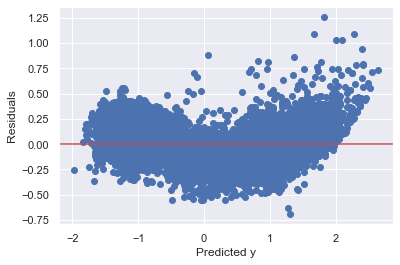

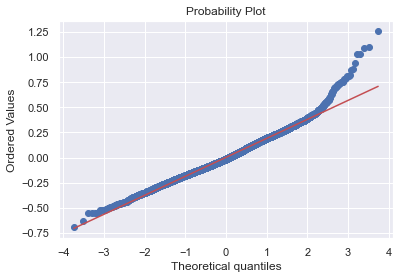

In [573]:
#check Lasso model performance
lasso_regr_model = Lasso(alpha=0.001)
model, mae,mse,rmse,r2,adj_r2,time_taken= run_model(lasso_regr_model, X_train, y_train, X_test, y_test)
model_data['model'].append(model)
model_data['mae'].append(mae)
model_data['mse'].append(mse)
model_data['rmse'].append(rmse)
model_data['r^2'].append(r2)
model_data['adj_r^2'].append(adj_r2)
model_data['time_taken'].append(time_taken)

In [574]:
#add Ridge regularization to the model to improve performance
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
outer_results=[]
#nested cross validation
cv_outer=KFold(n_splits=10,shuffle=True)
for train_index,test_index in cv_outer.split(X_train,y_train):
    X_train_ridge=X_train.iloc[train_index,:]
    y_train_ridge=y_train[y_train.index[train_index]]
    X_test_ridge=X_train.iloc[test_index,:]
    y_test_ridge=y_train[y_train.index[test_index]]
    lreg_model=Ridge()
    cv_inner=KFold(n_splits=3,shuffle=True)
    param_grid={'alpha':[0.0001,0.001,0.01,0.1,0.5]}
    scorer={'rmse':'neg_root_mean_squared_error','rc':'r2'}
    grid=GridSearchCV(lreg_model,param_grid=param_grid,cv=cv_inner,scoring='neg_root_mean_squared_error')
    result=grid.fit(X_train_ridge,y_train_ridge)
    best_model=result.best_estimator_
    yhatridge=best_model.predict(X_test_ridge)
    outer_results.append((best_model,np.sqrt(mean_squared_error(y_test_ridge,yhatridge))))
outer_results
#we choose the regularization parameter alpha=0.01

[(Ridge(alpha=0.0001), 0.18603861276629252),
 (Ridge(alpha=0.001), 0.19020063796487063),
 (Ridge(alpha=0.01), 0.19653286025010605),
 (Ridge(alpha=0.0001), 0.18919821884018875),
 (Ridge(alpha=0.01), 0.18933062999480285),
 (Ridge(alpha=0.001), 0.18700323602100802),
 (Ridge(alpha=0.01), 0.18679111313767402),
 (Ridge(alpha=0.01), 0.1880959836031852),
 (Ridge(alpha=0.01), 0.18497092425113376),
 (Ridge(alpha=0.01), 0.1905474786274176)]

MAE = 0.149
MSE = 0.036
RMSE = 0.19
R^2 = 0.965
Adj_R^2 = 0.9754907975460122
Time taken = 0.011


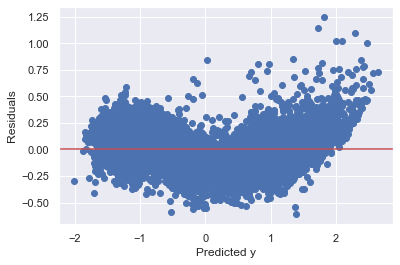

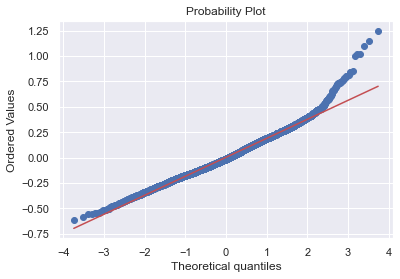

In [575]:
#check the Ridge model's performance
ridge_regr_model = Ridge(alpha=0.01)
model, mae,mse,rmse,r2,adj_r2,time_taken= run_model(ridge_regr_model, X_train, y_train, X_test, y_test)
model_data['model'].append(model)
model_data['mae'].append(mae)
model_data['mse'].append(mse)
model_data['rmse'].append(rmse)
model_data['r^2'].append(r2)
model_data['adj_r^2'].append(adj_r2)
model_data['time_taken'].append(time_taken)

In [576]:
##add ElasticNet regularization to the model to improve performance
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
outer_results=[]
#nested cross validation
cv_outer=KFold(n_splits=10,shuffle=True)
for train_index,test_index in cv_outer.split(X_train,y_train):
    X_train_elastic=X_train.iloc[train_index,:]
    y_train_elastic=y_train[y_train.index[train_index]]
    X_test_elastic=X_train.iloc[test_index,:]
    y_test_elastic=y_train[y_train.index[test_index]]
    lreg_model=ElasticNet()
    cv_inner=KFold(n_splits=3,shuffle=True)
    param_grid={'alpha':[0.0001,0.001,0.01,0.1,0.5]}
    scorer={'rmse':'neg_root_mean_squared_error','rc':'r2'}
    grid=GridSearchCV(lreg_model,param_grid=param_grid,cv=cv_inner,scoring='neg_root_mean_squared_error')
    result=grid.fit(X_train_elastic,y_train_elastic)
    best_model=result.best_estimator_
    yhatelastic=best_model.predict(X_test_elastic)
    outer_results.append((best_model,np.sqrt(mean_squared_error(y_test_elastic,yhatelastic))))
outer_results
#choose the regularization parameter alpha=0.0001

[(ElasticNet(alpha=0.0001), 0.19019817398274508),
 (ElasticNet(alpha=0.0001), 0.18036768314943563),
 (ElasticNet(alpha=0.0001), 0.1879757884423369),
 (ElasticNet(alpha=0.0001), 0.19079543928933276),
 (ElasticNet(alpha=0.0001), 0.19747406616095972),
 (ElasticNet(alpha=0.0001), 0.18902471418039904),
 (ElasticNet(alpha=0.0001), 0.1860354505623881),
 (ElasticNet(alpha=0.0001), 0.19042382968784227),
 (ElasticNet(alpha=0.0001), 0.18341900194434682),
 (ElasticNet(alpha=0.0001), 0.19268593063553582)]

MAE = 0.151
MSE = 0.036
RMSE = 0.19
R^2 = 0.964
Adj_R^2 = 0.9747905346187554
Time taken = 0.069


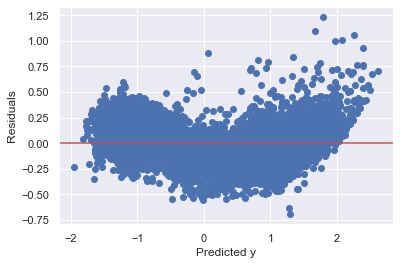

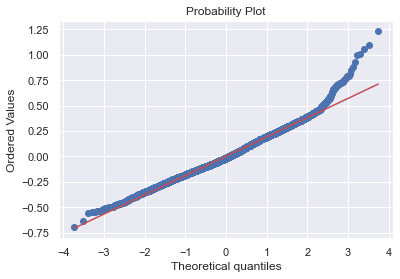

In [577]:
#check ElasticNet model performance
elastic_regr_model = ElasticNet(alpha=0.001)
model, mae,mse,rmse,r2,adj_r2,time_taken= run_model(elastic_regr_model, X_train, y_train, X_test, y_test)
model_data['model'].append(model)
model_data['mae'].append(mae)
model_data['mse'].append(mse)
model_data['rmse'].append(rmse)
model_data['r^2'].append(r2)
model_data['adj_r^2'].append(adj_r2)
model_data['time_taken'].append(time_taken)

In [580]:
#hyperparam tuninng with optuna for the best selected model RandomForestRegressor
import optuna
from sklearn.model_selection import cross_val_score
def objective(trial):
    n_estimators=trial.suggest_int('n_estimators',70,110)
    criterion=trial.suggest_categorical('criterion',['squared_error', 'absolute_error'])
    max_depth=trial.suggest_int('max_depth',3,10)
    min_samples_split=trial.suggest_int('min_samples_split',3,9)
    min_samples_leaf=trial.suggest_int('min_samples_leaf',3,9)
    max_features=trial.suggest_categorical('max_features',['sqrt', 'log2'])
    svc_optuna=RandomForestRegressor(n_estimators=n_estimators,criterion=criterion,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features)
    score=cross_val_score(svc_optuna,X_train,y_train, scoring = "neg_mean_squared_error")
    rmse=score.mean()
    return rmse

In [581]:
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=10)

[I 2023-05-26 11:39:16,744] A new study created in memory with name: no-name-0a28bece-4948-4d33-af9f-f76e1031ab54
[I 2023-05-26 11:44:37,445] Trial 0 finished with value: -0.17234061113088067 and parameters: {'n_estimators': 99, 'criterion': 'absolute_error', 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.17234061113088067.
[I 2023-05-26 11:44:39,660] Trial 1 finished with value: -0.2392974733418174 and parameters: {'n_estimators': 90, 'criterion': 'squared_error', 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.17234061113088067.
[I 2023-05-26 11:44:42,654] Trial 2 finished with value: -0.07644750794333656 and parameters: {'n_estimators': 73, 'criterion': 'squared_error', 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 2 with value: -0.07644750794333656.
[I 2023-05-26 11:50:12,682] Trial 3 f

In [582]:
study.best_trial.value

-0.06197917592939489

In [583]:
study.best_trial.params

{'n_estimators': 80,
 'criterion': 'squared_error',
 'max_depth': 9,
 'min_samples_split': 5,
 'min_samples_leaf': 8,
 'max_features': 'sqrt'}

MAE = 0.194
MSE = 0.064
RMSE = 0.253
R^2 = 0.937
Adj_R^2 = 0.9558834355828221
Time taken = 1.753


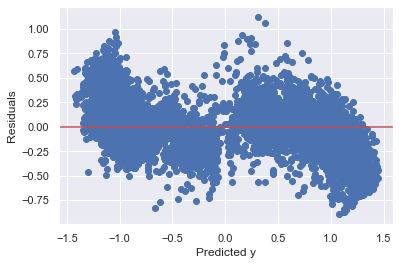

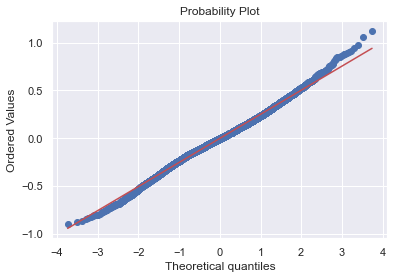

In [584]:
params_rf =study.best_trial.params

model_rf = RandomForestRegressor(**params_rf)
model, mae,mse,rmse,r2,adj_r2,time_taken= run_model(model_rf, X_train, y_train, X_test, y_test)
model_data['model'].append(model)
model_data['mae'].append(mae)
model_data['mse'].append(mse)
model_data['rmse'].append(rmse)
model_data['r^2'].append(r2)
model_data['adj_r^2'].append(adj_r2)
model_data['time_taken'].append(time_taken)

In [597]:
#hyperparam tuninng with optuna for the best selected model
import optuna
from sklearn.model_selection import cross_val_score
def objective(trial):
    n_estimators=trial.suggest_int('n_estimators',80,130)
    max_depth=trial.suggest_int('max_depth',1,10)
    eta=trial.suggest_int('eta',0.01,0.5)
    subsample=trial.suggest_int('subsample',0.7,1)
    colsample_bytree=trial.suggest_int('colsample_bytree',0.5,1)
    svc_optuna=XGBRegressor(n_estimators=n_estimators,max_depth=max_depth,eta=eta,subsample=subsample,colsample_bytree=colsample_bytree)
    score=cross_val_score(svc_optuna,X_train,y_train, scoring = "neg_mean_squared_error")
    rmse=score.mean()
    return rmse

In [598]:
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=20)

[I 2023-05-26 12:34:28,298] A new study created in memory with name: no-name-9804abfe-1caf-4ebf-ad31-6d1c4fe50eb4
[I 2023-05-26 12:34:29,182] Trial 0 finished with value: -1.2472646487817056 and parameters: {'n_estimators': 128, 'max_depth': 6, 'eta': 0, 'subsample': 0, 'colsample_bytree': 0}. Best is trial 0 with value: -1.2472646487817056.
[I 2023-05-26 12:34:33,236] Trial 1 finished with value: -1.2472646487817056 and parameters: {'n_estimators': 80, 'max_depth': 7, 'eta': 0, 'subsample': 1, 'colsample_bytree': 1}. Best is trial 0 with value: -1.2472646487817056.
[I 2023-05-26 12:34:34,004] Trial 2 finished with value: -1.2472646487817056 and parameters: {'n_estimators': 111, 'max_depth': 1, 'eta': 0, 'subsample': 0, 'colsample_bytree': 1}. Best is trial 0 with value: -1.2472646487817056.
[I 2023-05-26 12:34:34,851] Trial 3 finished with value: -1.2472646487817056 and parameters: {'n_estimators': 124, 'max_depth': 9, 'eta': 0, 'subsample': 0, 'colsample_bytree': 1}. Best is trial 0 

MAE = 0.938
MSE = 1.256
RMSE = 1.121
R^2 = -0.25
Adj_R^2 = 0.12467134092900967
Time taken = 0.19


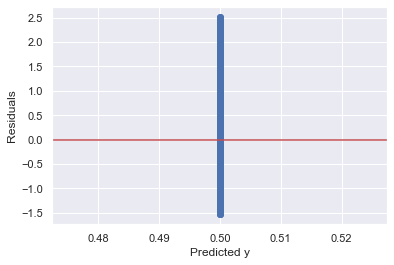

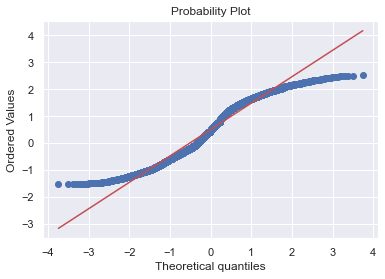

In [600]:
params_rf =study.best_trial.params

model_rf = XGBRegressor(**params_rf)
model, mae,mse,rmse,r2,adj_r2,time_taken= run_model(model_rf, X_train, y_train, X_test, y_test)
model_data['model'].append(model)
model_data['mae'].append(mae)
model_data['mse'].append(mse)
model_data['rmse'].append(rmse)
model_data['r^2'].append(r2)
model_data['adj_r^2'].append(adj_r2)
model_data['time_taken'].append(time_taken)

In [611]:
#hyperparam tuninng with optuna for the best selected model
import optuna
from sklearn.model_selection import cross_val_score
def objective(trial):
    hidden_layer_sizes=trial.suggest_int('hidden_layer_sizes',80,130)
    activation=trial.suggest_categorical('activation',['identity', 'logistic', 'tanh', 'relu'])
    solver=trial.suggest_categorical('solver',['lbfgs', 'sgd', 'adam'])
    alpha=trial.suggest_int('alpha',0.0001,0.3)
    learning_rate=trial.suggest_categorical('learning_rate',['constant', 'invscaling', 'adaptive'])
    svc_optuna=MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,activation=activation,solver=solver,alpha=alpha,learning_rate=learning_rate)
    score=cross_val_score(svc_optuna,X_train,y_train, scoring = "neg_mean_squared_error")
    rmse=score.mean()
    return rmse

In [612]:
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=20)

[I 2023-05-26 12:46:52,398] A new study created in memory with name: no-name-f3c978b8-635d-4eb8-8da9-3e244d917e05
[I 2023-05-26 12:47:03,081] Trial 0 finished with value: -0.8803486054420706 and parameters: {'hidden_layer_sizes': 81, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0, 'learning_rate': 'invscaling'}. Best is trial 0 with value: -0.8803486054420706.
[I 2023-05-26 12:47:12,318] Trial 1 finished with value: -0.0329458199533433 and parameters: {'hidden_layer_sizes': 87, 'activation': 'relu', 'solver': 'sgd', 'alpha': 0, 'learning_rate': 'constant'}. Best is trial 1 with value: -0.0329458199533433.
[I 2023-05-26 12:47:22,341] Trial 2 finished with value: -0.018751719853610065 and parameters: {'hidden_layer_sizes': 109, 'activation': 'relu', 'solver': 'adam', 'alpha': 0, 'learning_rate': 'adaptive'}. Best is trial 2 with value: -0.018751719853610065.
[I 2023-05-26 12:47:40,625] Trial 3 finished with value: -0.021357495594164576 and parameters: {'hidden_layer_sizes': 83, 'activ

MAE = 0.102
MSE = 0.017
RMSE = 0.13
R^2 = 0.983
Adj_R^2 = 0.9880955302366345
Time taken = 8.148


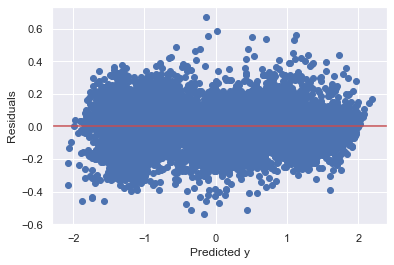

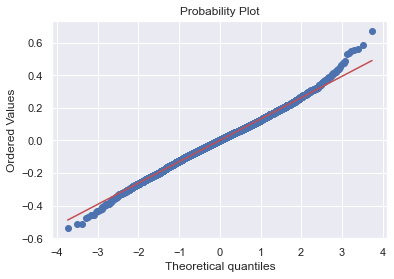

In [613]:
params_rf =study.best_trial.params

model_rf = MLPRegressor(**params_rf)
model, mae,mse,rmse,r2,adj_r2,time_taken= run_model(model_rf, X_train, y_train, X_test, y_test)
model_data['model'].append(model)
model_data['mae'].append(mae)
model_data['mse'].append(mse)
model_data['rmse'].append(rmse)
model_data['r^2'].append(r2)
model_data['adj_r^2'].append(adj_r2)
model_data['time_taken'].append(time_taken)

In [632]:
#show models performance in a DataFrame
data=pd.DataFrame(model_data)
data

model    mae    mse   rmse    r^2   adj_r^2  time_taken
0  Lasso(alph  0.150  0.036  0.190  0.964  0.974791       0.063
1  Ridge(alph  0.149  0.036  0.190  0.965  0.975491       0.011
2  ElasticNet  0.151  0.036  0.190  0.964  0.974791       0.069
3  RandomFore  0.194  0.064  0.253  0.937  0.955883       1.753
4  XGBRegress  0.938  1.256  1.121 -0.250  0.124671       0.190
5  MLPRegress  0.102  0.017  0.130  0.983  0.988096       8.148

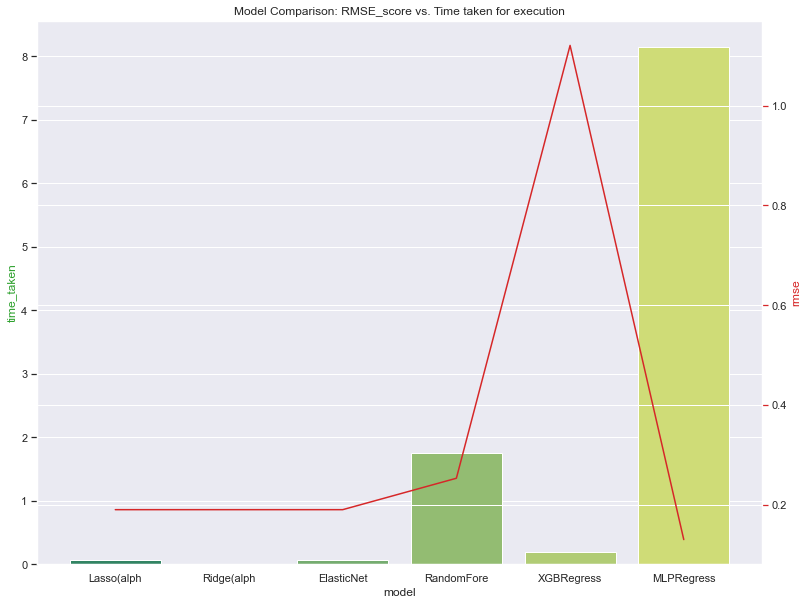

In [615]:
#model comparisons
#Lasso/Ridge/ElasticNet have low training times and low error
fig, ax1 = plt.subplots(figsize=(13,10))
ax1.set_title('Model Comparison: RMSE_score vs. Time taken for execution')
color = 'tab:green'
ax1.set_xlabel('Model')
ax1.set_ylabel('Time taken', color=color)
ax2 = sns.barplot(x='model', y='time_taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('rmse', color=color)
ax2 = sns.lineplot(x='model', y='rmse', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

In [630]:
def predict_price(carat,cut,color,clarity,depth,table,x,y,z):
    clarity_dict={ 'IF':1, 'VVS1':2, 'VVS2':3, 'VS1':4, 'VS2':5, 'SI1':6, 'SI2':7, 'I1':8} 
    cut_dict={'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
    volume=x*y*z
    vect=np.array([])
    vect=np.zeros(df_preprocessed.shape[1])
    vect[0]=cut_dict[cut]
    vect[1]=clarity_dict[clarity]
    vect[2]=table
    vect[3]=carat/volume
    vect[4]=table*z
    if color=='D':
        vect[5]=vect[6]=vect[7]=vect[8]=vect[9]=vect[10]=0
    else:
        index_color=np.where(df_preprocessed.columns=='color_'+color)[0]
        if len(index_color)>0: 
            vect[index_color[0]]=1
    
    return vect.reshape(1, -1)
    

In [629]:
vp=predict_price(1,'Fair','D','IF',1,2,3,4,5)
vp

array([[1.        , 1.        , 2.        , 0.01666667, 8.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [637]:
lrmodel.predict(vp)

array([40.75497664])

In [633]:
finalmodel=Ridge(alpha=0.0001)
finalmodel.fit(X_train.values,y_train)

Ridge(alpha=0.0001)

In [634]:
import pickle
with open('gemstone_pickle_fm','wb') as f:
    pickle.dump(finalmodel,f)

In [635]:
import json
columns={
    'data_columns' : [col for col in df_preprocessed.columns]
}
with open('gemstone_json_fm','w') as f:
     f.write(json.dumps(columns))